<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%80%D0%B0%D0%BA%D0%B0_%D0%B3%D1%80%D1%83%D0%B4%D0%B8_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Keras_%D0%B8_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Классификация рака груди с помощью Keras и глубокого обучения


### Classifying breast cancer with Keras and deep learning 

В этом уроке вы узнаете, как обучить модель глубокого обучения Keras прогнозированию рака груди на изображениях гистологии груди.

In this tutorial, you will learn how to train the Keras deep learning model to predict breast cancer on breast histology images.

Мы создадим Python-код, чтобы разделить входной набор данных на три выборки:

We'll create Python code to split the input dataset into three samples:

1. обучающая; educational
2. валидационная; validation
3. тестовая; test



Затем мы будем использовать Keras для создания сверточной нейронной сети, которую мы соответствующим образом назовем «CancerNet».


We will then use Keras to create a convolutional neural network, which we will appropriately call "CancerNet".



Затем создадим Python-код для обучения CancerNet на наших гистологических изображениях груди.



Next, we'll create Python code to train CancerNet on our breast histology images.




Набор данных, который мы будем использовать, предназначен для инвазивной протоковой карциномы (IDC), самого распространенного из всех видов рака груди.



The dataset we will be using is for invasive ductal carcinoma (IDC), the most common of all breast cancers.

### Загрузка файлов
### Download the code zip file



In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_19.breast_cancer_classification.zip
!unzip -qq Lesson_19.breast_cancer_classification.zip
%cd /content/Lesson_19.breast_cancer_classification/


--2022-02-15 18:14:27--  http://dataudt.ru/datasets/cv/Lesson_19.breast_cancer_classification.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9030310 (8.6M) [application/zip]
Saving to: ‘Lesson_19.breast_cancer_classification.zip’

Lesson_19.breast_ca 100%[===================>]   8.61M  8.42MB/s    in 1.0s    

2022-02-15 18:14:28 (8.42 MB/s) - ‘Lesson_19.breast_cancer_classification.zip’ saved [9030310/9030310]

/content/Lesson_19.breast_cancer_classification


### Загрузка датасета
### Downloading the dataset

Поскольку этот датасет размещен на Kaggle, у нас есть несколько вариантов получения его из Kaggle в нашу среду Colab Notebook:

Since this dataset is hosted on Kaggle, we have a few options to get the dataset from Kaggle to our Colab Notebook environment:

* Загрузите набор данных из Kaggle в виде заархивированного файла, затем загрузите его на наш Google Диск, а затем подключите Google Диск в Colab, чтобы получить доступ к загруженному набору данных. Download the dataset from Kaggle as a zipped file, upload that to our Google Drive, and then mount Google Drive on Colab to access the uploaded dataset. 
* Используйте [Kaggle API](https://github.com/Kaggle/kaggle-api), чтобы напрямую загрузить набор данных в нашу среду Colab Notebook.  Use the [Kaggle API](https://github.com/Kaggle/kaggle-api) to directly download the dataset to our Colab Notebook environment. 




Мы будем использовать второй вариант. Обратите внимание, что для выполнения этого шага вам необходимо получить ключи API Kaggle. Следуйте инструкциям [здесь](https://github.com/Kaggle/kaggle-api), чтобы получить ключи Kaggle API, если у вас их нет.


We will be using the second option. **Note** that you need to obtain your Kaggle API keys to perform this step. Follow the instructions [here](https://github.com/Kaggle/kaggle-api) in order to obtain your Kaggle API keys in case you don't have them. 

Использование Kaggle API:
Чтобы использовать Kaggle API, зарегистрируйте учетную запись Kaggle на https://www.kaggle.com . Затем перейдите на вкладку «Учетная запись» в своем профиле пользователя ( https://www.kaggle.com/ [username] /account) и выберите «Создать токен API». Это вызовет загрузку kaggle.jsonфайла, содержащего ваши учетные данные API.


Using the Kaggle API:
To use the Kaggle API, register a Kaggle account at https://www.kaggle.com . Then go to the "Account" tab in your user profile ( https://www.kaggle.com/ [username]/account) and select "Create API token". This will cause a kaggle.jsonfile containing your API credentials to be downloaded.


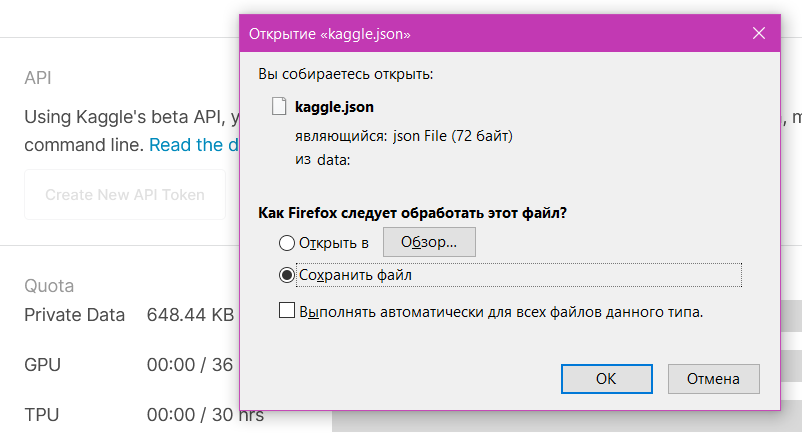

Затем загрузите файл kaggle.json в хранилище Colab Notebook. 

Then upload the kaggle.json file to the Colab Notebook repository.

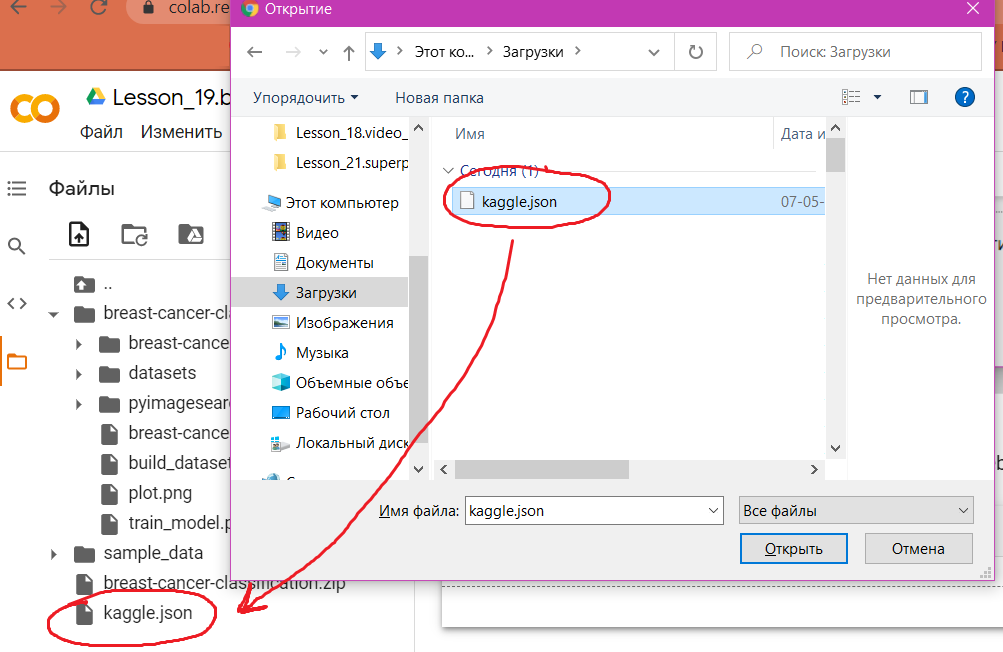

 После того, как файл ключей был загружен, нам нужно переместить его в соответствующее место.

  Once the key file has been downloaded, we need to move it to the appropriate location.


In [4]:
!mkdir ~/.kaggle
!cp /content/sample_data/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Теперь загружаем датасет.

Now, we can download the dataset. 

In [5]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [00:57<00:00, 84.9MB/s]
100% 3.10G/3.10G [00:57<00:00, 57.8MB/s]


In [6]:
!mkdir datasets
!mkdir datasets/orig
!mv breast-histopathology-images.zip datasets/orig/
%cd datasets/orig/
!unzip -qq breast-histopathology-images.zip -x "IDC_regular_ps50_idx5/*"
%cd /content/Lesson_19.breast_cancer_classification

/content/Lesson_19.breast_cancer_classification/datasets/orig
/content/Lesson_19.breast_cancer_classification


### Импорт библиотек
### Import Packages

In [7]:
# устанавливаем matplotlib, чтобы изображения можно было сохранять в фоновом режиме
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# импортируем необходимые библиотеки
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import shutil
import os

### Класс конфигурации
### Our Config class

In [8]:
class Config:
    # инициализируем путь к * исходному * входному каталогу изображений
    # initialize the path to the *original* input directory of images
    ORIG_INPUT_DATASET = "datasets/orig"

    # инициализируем базовый путь к * новому * каталогу, который будет содержать
    # наши изображения после разделения на обучающую и тестовую выборки
    # initialize the base path to the *new* directory that will contain
    # our images after computing the training and testing split
    BASE_PATH = "datasets/idc"

    # получаем каталоги обучающей, валидационной и тестовой выборок
    # derive the training, validation, and testing directories
    TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
    VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
    TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])

    # определяем количество данных, которые будут использоваться при обучении
    # define the amount of data that will be used training
    TRAIN_SPLIT = 0.8

    # количество валидационных данных будет в процентах от обучающей выборки
    # the amount of validation data will be a percentage of the
    # *training* data
    VAL_SPLIT = 0.1

# создаем экземпляр класса
# initialize our config class
config = Config()

### Создание датасета с картинками
### Building the breast cancer image dataset

In [9]:
# получаем пути ко всем входным изображениям в исходном входном каталоге
# и перемешиваем их
# grab the paths to all input images in the original input directory
# and shuffle them
imagePaths = list(paths.list_images(config.ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(imagePaths)

# разделяем на обучающую и тестовую выборки
# compute the training and testing split
i = int(len(imagePaths) * config.TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

# мы будем использовать часть обучающих данных для валидации
# we'll be using part of the training data for validation
i = int(len(trainPaths) * config.VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

# определяем датасеты, которые мы будем собирать
# define the datasets that we'll be building
datasets = [
	("training", trainPaths, config.TRAIN_PATH),
	("validation", valPaths, config.VAL_PATH),
	("testing", testPaths, config.TEST_PATH)
]

In [10]:
# перебираем наборы данных
# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
	
    # показываем, как разделяем данные
    # show which data split we are creating
	print("[INFO] building '{}' split".format(dType))
	
    # если выходного каталога не существует, создаем его
    # if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)
	
    # перебираем пути входных изображений
    # loop over the input image paths
	for inputPath in imagePaths:
        # извлекаем имя файла входного изображения и метку класса
		# («0» для «отрицательного» и «1» для «положительного»)
		# extract the filename of the input image and extract the
		# class label ("0" for "negative" and "1" for "positive")
		filename = inputPath.split(os.path.sep)[-1]
		label = filename[-5:-4]
		
        # создадим путь к каталогу меток
        # build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])
		
        # если каталога выходных меток не существует, создаем его
        # if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)
		
        # создадим путь к целевому изображению, а затем скопируем
		# само изображение
        # construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)

[INFO] building 'training' split
[INFO] 'creating datasets/idc/training' directory
[INFO] 'creating datasets/idc/training/0' directory
[INFO] 'creating datasets/idc/training/1' directory
[INFO] building 'validation' split
[INFO] 'creating datasets/idc/validation' directory
[INFO] 'creating datasets/idc/validation/0' directory
[INFO] 'creating datasets/idc/validation/1' directory
[INFO] building 'testing' split
[INFO] 'creating datasets/idc/testing' directory
[INFO] 'creating datasets/idc/testing/0' directory
[INFO] 'creating datasets/idc/testing/1' directory


### CancerNet: CNN, предсказывающая рак груди
### CancerNet: Our breast cancer prediction CNN

In [11]:
class CancerNet:
	@staticmethod
	def build(width, height, depth, classes):
        # инициализируем модель вместе с формой входа как
		# "каналы последние" и сам размер каналов
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

        # если мы используем "каналы первые", то обновим форму входа
		# и размерность каналов
		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

        # свертка => функция активации RELU => пулинг
		# CONV => RELU => POOL
		model.add(SeparableConv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

        # (свертка => функция активации RELU => пулинг) * 2
		# (CONV => RELU => POOL) * 2
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

        # (свертка => функция активации RELU => пулинг) * 3
		# (CONV => RELU => POOL) * 3
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

        # первый (и единственный) слой FC => слои RELU
		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(256))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

        # softmax классификатор
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

        # возвращаем построенную архитектуру сети
		# return the constructed network architecture
		return model

### Код обучения
### Our training script

In [12]:
# явно укажем аргументы необходимые для работы
# plot - путь к графику потерь/точности вывода

# explicitly specify the arguments needed to work
# plot - path to output loss/accuracy plot

args = {
	"plot": "plot.png",
}

In [13]:
# инициализируем количество эпох, начальный шаг обучения и размер батча
# initialize our number of epochs, initial learning rate, and batch
# size
NUM_EPOCHS = 20
INIT_LR = 1e-2
BS = 32

# определяем общее количество путей к изображениям в обучающей, валидационной и тестовой выборках
# determine the total number of image paths in training, validation,
# and testing directories
trainPaths = list(paths.list_images(config.TRAIN_PATH))
totalTrain = len(trainPaths)
totalVal = len(list(paths.list_images(config.VAL_PATH)))
totalTest = len(list(paths.list_images(config.TEST_PATH)))

# вычисляем общее количество каждого класса изображений в обучающей выборке и
# инициализируем словарь для хранения весов
# calculate the total number of training images in each class and
# initialize a dictionary to store the class weights
trainLabels = [int(p.split(os.path.sep)[-2]) for p in trainPaths]
trainLabels = to_categorical(trainLabels)
classTotals = trainLabels.sum(axis=0)
classWeight = dict()

# перебираем все классы и вычисляем веса класса
# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
	classWeight[i] = classTotals.max() / classTotals[i]

In [14]:
# создаем аугментации данных
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rescale=1 / 255.0,
	rotation_range=20,
	zoom_range=0.05,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.05,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

# создаем аугментации для валидационных и тестовых данных
# initialize the validation (and testing) data augmentation object
valAug = ImageDataGenerator(rescale=1 / 255.0)

In [15]:
# инициализируем тренировочный генератор
# initialize the training generator
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(48, 48),
	color_mode="rgb",
	shuffle=True,
	batch_size=BS)

# инициализируем валидационный генератор
# initialize the validation generator
valGen = valAug.flow_from_directory(
	config.VAL_PATH,
	class_mode="categorical",
	target_size=(48, 48),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

# инициализируем тестовый генератор
# initialize the testing generator
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(48, 48),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

Found 199818 images belonging to 2 classes.
Found 22201 images belonging to 2 classes.
Found 55505 images belonging to 2 classes.


In [ ]:
# инициализируем нашу модель CancerNet и компилируем ее
# initialize our CancerNet model and compile it
model = CancerNet.build(width=48, height=48, depth=3,
	classes=2)
opt = Adagrad(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# обучаем модель
# fit the model
H = model.fit(
	x=trainGen,
	steps_per_epoch=totalTrain // BS,
	validation_data=valGen,
	validation_steps=totalVal // BS,
	class_weight=classWeight,
	epochs=NUM_EPOCHS)

Epoch 1/20
6244/6244 [==============================] - 1726s 276ms/step - loss: 0.6777 - accuracy: 0.7977 - val_loss: 0.4575 - val_accuracy: 0.8213
Epoch 2/20
6244/6244 [==============================] - 1724s 276ms/step - loss: 0.5954 - accuracy: 0.8214 - val_loss: 0.4473 - val_accuracy: 0.8256
Epoch 3/20
6244/6244 [==============================] - 1737s 278ms/step - loss: 0.5801 - accuracy: 0.8284 - val_loss: 0.4435 - val_accuracy: 0.8255
Epoch 4/20
6244/6244 [==============================] - 1712s 274ms/step - loss: 0.5738 - accuracy: 0.8291 - val_loss: 0.4401 - val_accuracy: 0.8264
Epoch 5/20
6244/6244 [==============================] - 1855s 297ms/step - loss: 0.5709 - accuracy: 0.8299 - val_loss: 0.4365 - val_accuracy: 0.8264
Epoch 6/20
6244/6244 [==============================] - 1925s 308ms/step - loss: 0.5714 - accuracy: 0.8290 - val_loss: 0.4346 - val_accuracy: 0.8272
Epoch 7/20
6244/6244 [==============================] - 1949s 312ms/step - loss: 0.5712 - accuracy: 0.8305

Обучение занимает около 10 часов.

The training takes about 10 hours.

Сохраняем предобученную модель.

We save the pretrained model.

In [ ]:
model.save('my_model.h5')

При желании можно загрузить уже обученную модель, чтобы не обучать ее повторно.

You can load an already trained model so as not to train it again.

In [16]:
from keras.models import load_model
model = load_model('my_model.h5')

In [17]:
# сбрасываем генератор тестирования, а затем используем нашу обученную модель для предсказания
# reset the testing generator and then use our trained model to
# make predictions on the data
print("[INFO] evaluating network...")
testGen.reset()
predIdxs = model.predict(x=testGen, steps=(totalTest // BS) + 1)

# для каждого изображения в тестовом наборе находим индекс
# метки с соответствующей наибольшей предсказанной вероятностью
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# показываем красиво отформатированный отчет о классификации
# show a nicely formatted classification report
print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     39595
           1       0.68      0.76      0.72     15910

    accuracy                           0.83     55505
   macro avg       0.79      0.81      0.80     55505
weighted avg       0.84      0.83      0.83     55505



In [18]:
# вычисляем матрицу ошибок и используем ее для получения
# точности, чувствительности и специфичности
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testGen.classes, predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# показываем матрицу ошибок, точность, чувствительность и специфичность
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[33864  5731]
 [ 3791 12119]]
acc: 0.8284
sensitivity: 0.8553
specificity: 0.7617


In [19]:
# строим графики функции потерь при обучении и точности
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

NameError: ignored